# Wczytujemy dane

In [2]:
import os
import matplotlib.pyplot as plt
import mne

%matplotlib inline

Plik ten sam co ostatnio (`'sternberg_diam_015_AK-epo.fif'`), tym razem wczytajcie go sami. Im mniej pomocy potrzebujecie przy tym (ze strony internetu, innych studentów), tym lepiej.

In [ ]:
# wczytujemy

Tak jak wcześniej - robimy widmo dla warunków l2 i l4, tylko dla elektrod Pz i Fz. Znów - im mniej musicie sięgać do źródeł zewnętrznych względem swojego mózgu - tym lepiej.

In [ ]:
# tutaj robimy widmo

I ponownie, tak jak na ostatnich zajęciach, stajemy przed dylematem:
chcemy zdefiniować sobie dwa pasma częstotliwościowe:
* 9 - 11 Hz (tu widać efekt dla elektrod potylicznych)
* 12 - 14 Hz (tu widać efekt dla elektrod czołowych)

Chcemy uśrednić w tych pasmach widmo (ale nie będzimy chcieli uśredniać epok).  
Dodatkowo, chcemy to zrobić zarówno dla elektrody Pz jak i Fz.  
Na początek skupmy się na elektrodzie Pz, paśmie 9 - 11.  
Do szykania zakresów przyda się Wam funkcja z ostatnich zajęć:  

In [14]:
def znajdź_zakres(freq, lo, hi):
    abs_diff_lo = np.abs(freq - lo)
    lo_idx = np.argmin(abs_diff_lo)
    abs_diff_hi = np.abs(freq - hi)
    hi_idx = np.argmin(abs_diff_hi)
    return lo_idx, hi_idx + 1

Przypomnienie: używamy jej tak:

In [17]:
import numpy as np
częstotliwości = np.linspace(0, 15, num=29)
print(częstotliwości)

[  0.           0.53571429   1.07142857   1.60714286   2.14285714
   2.67857143   3.21428571   3.75         4.28571429   4.82142857
   5.35714286   5.89285714   6.42857143   6.96428571   7.5          8.03571429
   8.57142857   9.10714286   9.64285714  10.17857143  10.71428571  11.25
  11.78571429  12.32142857  12.85714286  13.39285714  13.92857143
  14.46428571  15.        ]


In [18]:
l, h = znajdź_zakres(częstotliwości, 8, 10)
print(l, h)
print(częstotliwości[l:h])

15 20
[  8.03571429   8.57142857   9.10714286   9.64285714  10.17857143]


W podobny sposób możemy wybrać jakiś zakres częstotliwościowy oraz go uśrednić.
Pomyślcie jak zrobić średnią dla zakresu 9 - 11 Hz dla widma z elektrody Pz, warunku l2.

In [ ]:
# tutaj robymy średnią

Powiedzmy, że mamy teraz tę średnią w zmiennej `avg_Pz_l2`. Zaraz zrobicie sobie średnią dla drugiego warunku i porównacie, ale możecie sprawdzić czy Wam się zgadzają wartości:

In [38]:
print(avg_Pz_l2[:10])

[  2.04452392e-13   4.63009945e-13   3.50157130e-13   7.12665727e-13
   3.43636470e-12   4.28019437e-13   1.00826767e-13   4.81434040e-13
   4.77254109e-13   6.38572878e-13]


Możemy też zobaczyć sobie histogram:

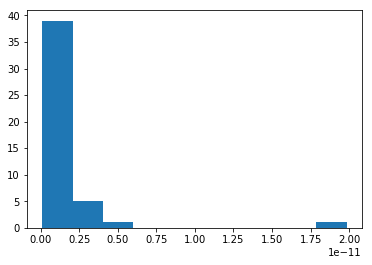

In [40]:
plt.hist(avg_Pz_l2);

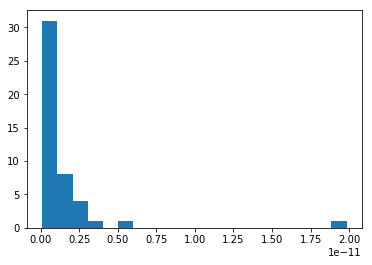

In [42]:
plt.hist(avg_Pz_l2, bins=20);

Weźcie pod uwagę że rozkład jest bardzo wyraźnie skośny - później przeprowadzimy test również dla zlogarytmizowanych wartości.  
Policzcie więc sobie również `avg_Pz_l4`, a następnie poszukajcie informacji w necie jak zrobić test t dla prób niezależnych
(test przeprowadzamy teraz na epokach z jednej osoby i chociaż epoki pochodzące z tej samej osoby będą do siebie bardziej podobne niż pochodzące od dwóch różnych osób, w kontekście testów wewnątrz osoby możemy je traktować jako niezależne).

In [ ]:
# liczymy avg_Pz_l4 oraz porównujemy testem t

Gdy wybrzmi już wynik testu, sprawdźmy co się dzieje w sytuacji gdy zlogarytmizujemy nasze zmienne.
Skorzystaj do tego z `np.log` (logarytm naturalny) albo `np.log10` (logarytm o podstawie 10).

In [ ]:
# test znów

Odpowiedz na pytanie: 
> czy wynik testu zmienia się w zależności od logarytmizacji danych?  
> Dlaczego (tak/nie)?

Następnie przeprowadź ten sam test dla drugiej elektrody a także obu elektrod dla drugiego pasma częstotliwościowego.

In [ ]:
# testy

Jak zrobić wykres do tych testów? Na razie wybierzemy sobie jeden test i skorzystamy z pakietu `seaborn` aby zwizualizować porównywane dane.

Co gdymyśmy chcieli wykonać porównania dla każdego punktu widma?

In [ ]:
# możesz spróbować, ale to pokażę jak zrobić

(w zależnosći od tego czy jest na to czas): korekta cluster-based

## Czas-częstość

In [5]:
import numpy as np
from mne.time_frequency import tfr_morlet

In [6]:
freq = np.arange(3, 20, 0.25)
n_cycles = freq / 2.5

tfr_2 = tfr_morlet(epochs['l2'], freq, n_cycles, use_fft=True,
                   return_itc=False, n_jobs=3)
tfr_4 = tfr_morlet(epochs['l4'], freq, n_cycles, use_fft=True,
                   return_itc=False, n_jobs=3)

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.8s
[Parallel(n_jobs=3)]: Done  63 out of  63 | elapsed:    8.4s finished
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.7s
[Parallel(n_jobs=3)]: Done  63 out of  63 | elapsed:    8.4s finished


In [9]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [10]:
tfr_2.plot_topo(baseline=(-0.4, -0.1), mode='percent');

Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)


In [11]:
%matplotlib inline

Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)


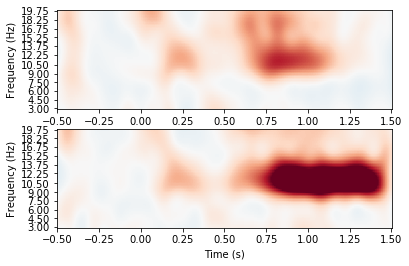

In [12]:
ch = epochs.ch_names.index('PO3')

fig, ax = plt.subplots(nrows=2)
tfr_2.plot([ch], baseline=(-0.4, -0.1), mode='percent', axes=ax[0], show=False,
           vmin=-5, vmax=5, colorbar=False);
tfr_4.plot([ch], baseline=(-0.4, -0.1), mode='percent', axes=ax[1],
           vmin=-5, vmax=5, colorbar=False);